# MINE-4101: Parcial 1

Juan Sebastian Alvarez Eraso

Código: 201822427

*“Al entregar la solución de este parcial, yo, Juan Sebastian Alvarez Eraso con código 201822427 me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial“*

# Diccionario de datos

id: Identificador del inmueble

neighbourhood group: Localidad o distrito en el que se encuentra el inmueble

neighbourhood:& Barrio en el que se encuentra el inmueble

lat: Geolocalización del inmueble

long: Geolocalización del inmueble

country: País en el que se encuentra el inmueble

instant_bookable: Indicador de si es posible realizar reserva directamente en la plataforma

cancellation_policy: Política de cancelación de la reserva

room type: Tipo de inmueble

construction year: Año de construcción del inmueble

price: Precio por noche del inmueble

service fee: Costo del servicio el cual debe ser cancelado al dejar el inmueble

minimum nights: Cantidad mínima de noches que el inmueble puede ser reservado

availability 365: Disponibilidad total en días durante el último año

number of reviews: Total de comentarios del inmueble

review rate number: Calificación promedio dada al inmueble

# Configuración inicial

In [1]:
# Setup
RUTA_DEL_DATASET_HISTORY = 'https://raw.githubusercontent.com/juanalvarez123/MINE-4101-parcial-1/main/Datasets/losalpes_history.csv'
RUTA_DEL_DATASET_NEW = 'https://raw.githubusercontent.com/juanalvarez123/MINE-4101-parcial-1/main/Datasets/losalpes_new.csv'

import pandas as pd
import warnings
import matplotlib.pyplot as plt

# Configuración de pandas para extender el número de filas y columnas en la visualización
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# Deshabilitar warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

!pip install pylev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Cargar los datasets
df = pd.read_csv(RUTA_DEL_DATASET_HISTORY)
df_new_tmp = pd.read_csv(RUTA_DEL_DATASET_NEW)

df.head(5)

,id,neighbourhood group,neighbourhood,lat,long,country,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
0,48540006,Manhattan,Hell's Kitchen,40.76212,-73.98820,United States,True,strict,Entire home/apt,2011.0,$ 851,$ 170,4.0,199.0,112.0,1.0
1,35079903,Manhattan,Midtown,40.74623,-73.98499,United States,True,flexible,Hotel room,2021.0,$ 466,$ 93,1.0,161.0,13.0,5.0
2,50681273,Manhattan,Upper West Side,40.78859,-73.97568,United States,False,flexible,Private room,2004.0,$ 874,$ 175,14.0,0.0,1.0,2.0
3,13039267,Manhattan,Financial District,40.70817,-74.00511,United States,False,strict,Private room,2012.0,$ 813,$ 163,1.0,0.0,5.0,3.0
4,8998640,Manhattan,Lower East Side,40.72130,-73.98900,United States,True,moderate,Entire home/apt,2007.0,$ 326,$ 65,4.0,301.0,9.0,3.0


In [3]:
# Muestro la cantidad de registros y de columnas del dataset history
df.shape

(102083, 16)

In [4]:
# Muestro los tipos de datos del dataset history
df.dtypes

id                       int64
neighbourhood group     object
neighbourhood           object
lat                    float64
long                   float64
country                 object
instant_bookable        object
cancellation_policy     object
room type               object
construction year      float64
price                   object
service fee             object
minimum nights         float64
availability 365       float64
number of reviews      float64
review rate number     float64
dtype: object

In [5]:
# Verifico la cantidad de nulos
df.isnull().sum()

id                        0
neighbourhood group     620
neighbourhood           607
lat                     599
long                    599
country                1116
instant_bookable        696
cancellation_policy     667
room type               591
construction year       804
price                   838
service fee             863
minimum nights          994
availability 365       1034
number of reviews       770
review rate number      909
dtype: int64

Hay muchos nulos, se debe hacer un tratamiento para estos datos.

# Limpieza y preparación de los datos

In [6]:
# Ver los valores únicos para las ciudades ("neighbourhood group")
df['neighbourhood group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', nan,
       'Quens', 'Manattan', 'Broolkyn', 'Manhatan', 'brookln', 'manhatan'],
      dtype=object)

Hay valores como "Manhattan" y "Manhatan" que hacen referencia al mismo "neighbourhood group".

In [7]:
# Reviso los valores únicos de la columna "country"
df['country'].unique()

array(['United States', nan, 'United States of America'], dtype=object)

Hay varios valores, pero todos correspoden con "United States" como país.

In [8]:
# Reviso los valores únicos de "room type"
df['room type'].unique()

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room',
       nan], dtype=object)

Hay varios valores pero están correctos, no hace falta unificarlos.

Revisando los datos he tomado las siguientes desiciones:
1. Los valores para "neighbourhood group" hay que unificarlos ya que hay algunos con typo errors.
2. La columna "country" solo tiene el valor de "United States", hay más valores pero en realidad solo corresponden a uno, se puede eliminar.
3. Transformo los valores de "instant_bookable" para trabajar con 0 y 1.
4. Corregir los valores y el tipo de dato de "price" y de "service fee" ya que no son numéricos y además tienen caracteres especiales. Además, llenar los campos nulos con los valores promedio de estos.
5. Llenar las columnas "minimum nights" y "availability 365" con la media de estas columnas.
6. En el enunciado del ejercicio se menciona *“La popularidad de un inmueble está dada en términos de la cantidad de comentarios (reviews) que ha obtenido independientemente de su calificación“*, por lo que es posible también eliminar la columna "review rate number".
7. Eliminar los inmuebles duplicados.
8. Trabajar en terminos porcentuales con la columna "number of reviews" ya que está dada en cantidad y es más trabajable en terminos porcentuales.
9. Arreglar los años de construcción que están muy por debajo o muy por encima del promedio.

Para ejecutar luego del análisis exploratorio:
1. El "id" del inmueble no aporta nada a la definición del modelo, esa columna se puede eliminar.
2. Eliminar todos las filas que contengan valores nulos.
3. Dejar por fuera a los outliers.

In [9]:
# 1. Los valores para "neighbourhood group" hay que unificarlos
import pylev
import numpy as np

def get_neighbourhood_group(value):
  if pd.isnull(value):
    return np.nan

  acceptable_distance = 3
  if pylev.levenshtein('Manhattan', value) <= acceptable_distance:
    return 'Manhattan'
  elif pylev.levenshtein('Brooklyn', value) <= acceptable_distance:
    return 'Brooklyn'
  elif pylev.levenshtein('Queens', value) <= acceptable_distance:
    return 'Queens'
  elif pylev.levenshtein('Bronx', value) <= acceptable_distance:
    return 'Bronx'
  elif pylev.levenshtein('Staten Island', value) <= acceptable_distance:
    return 'Staten Island'
  else:
    return value

# Aplico la función creada sobre la columna "neighbourhood group"
df['neighbourhood group'] = df['neighbourhood group'].apply(get_neighbourhood_group)
df_new_tmp['neighbourhood group'] = df_new_tmp['neighbourhood group'].apply(get_neighbourhood_group)

# Verifico cuales son los valores únicos en la columna "neighbourhood group"
df['neighbourhood group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', nan],
      dtype=object)

In [10]:
# 2. La columna "country" solo tiene el valor de "United States", se puede eliminar.
df.drop('country', axis=1, inplace=True)
df_new_tmp.drop('country', axis=1, inplace=True)

# Verifico la cantidad de columnas, deberían ser 15 ahora
df.shape

(102083, 15)

In [11]:
# 3. Transformo los valores de "instant_bookable" para trabajar con 0 y 1
df['instant_bookable'] = df['instant_bookable'].apply(lambda x: 1 if x else 0)
df_new_tmp['instant_bookable'] = df_new_tmp['instant_bookable'].apply(lambda x: 1 if x else 0)

# Verifico que el tipo de dato de "instant_bookable" haya cambiado a int
df.dtypes

id                       int64
neighbourhood group     object
neighbourhood           object
lat                    float64
long                   float64
instant_bookable         int64
cancellation_policy     object
room type               object
construction year      float64
price                   object
service fee             object
minimum nights         float64
availability 365       float64
number of reviews      float64
review rate number     float64
dtype: object

In [12]:
# 4. Corregir los valores y el tipo de dato de "price" y de "service fee"
import numpy as np

def fix_number(value):
  if pd.isnull(value):
    return np.nan
  value = value.replace('$', '')
  value = value.replace(' ', '')
  value = value.replace(',', '.')
  return value

# En history
df['price'] = df['price'].apply(fix_number)
df['service fee'] = df['service fee'].apply(fix_number)

# En new
df_new_tmp['price'] = df_new_tmp['price'].apply(fix_number)
df_new_tmp['service fee'] = df_new_tmp['service fee'].apply(fix_number)

# Cambio los tipos de datos de las 2 columnas
df = df.astype({'price': np.float64,
                'service fee': np.float64})
df_new_tmp = df_new_tmp.astype({'price': np.float64,
                                'service fee': np.float64})

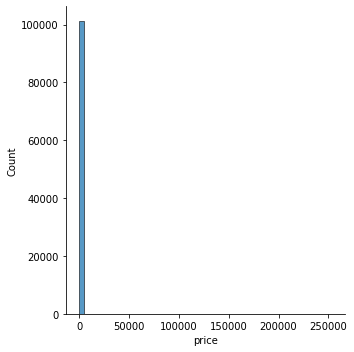

In [13]:
# Antes de completar los valores nulos verifico la distribución "price"
import seaborn as sns

sns.displot(df['price'], bins=50)

Hay valores muy altos para 'price'.

In [14]:
df[df['price'] > 10000]

,id,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
59645,17111375,Manhattan,Kips Bay,40.74351,-73.97857,0,strict,Shared room,2004.0,254000.0,51.0,1.0,324.0,4.0,5.0


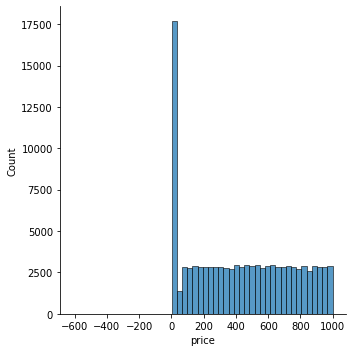

In [15]:
# Se corrigen los registros de "price" asumiendo que hubo un error en la digitación
df.loc[df['price'] > 10000, 'price'] = 254
# No lo hago en df_new_tmp debido a que no hay registros con este error

sns.displot(df['price'], bins=50)

Se puede observar ahora que hay valores negativos.

In [16]:
df[df['price'] < 0]

,id,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
32220,17462638,Brooklyn,Bushwick,40.705,-73.91933,1,moderate,Private room,2004.0,-611.0,122000.0,14.0,0.0,0.0,4.0


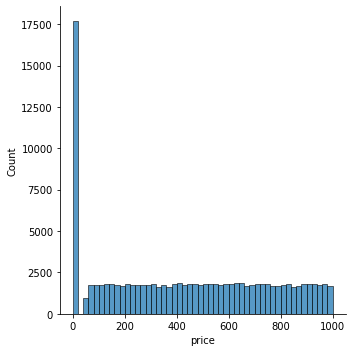

In [17]:
# Se corrigen los registros de "price" asumiendo que hubo un error en la digitación
df.loc[df['price'] < 0, 'price'] = 611
# No lo hago en df_new_tmp debido a que no hay registros con este error

sns.displot(df['price'], bins=50)

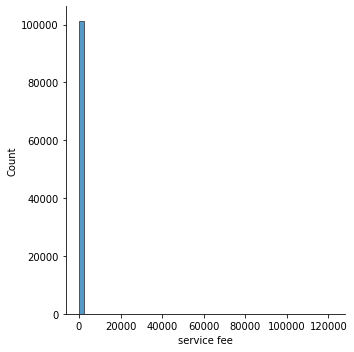

In [18]:
# Antes de completar los valores nulos verifico la distribución "service fee"
sns.displot(df['service fee'], bins=50)

Hay valores de 'service fee' muy por encima del promedio.

In [19]:
df[df['service fee'] > 20000]

,id,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
32220,17462638,Brooklyn,Bushwick,40.705,-73.91933,1,moderate,Private room,2004.0,611.0,122000.0,14.0,0.0,0.0,4.0


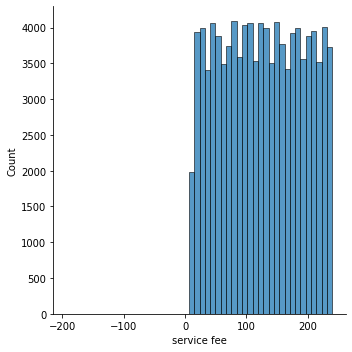

In [20]:
# Se corrigen los registros de "service fee" asumiendo que hubo un error en la digitación
df.loc[df['service fee'] > 20000, 'service fee'] = 122
# No lo hago en df_new_tmp debido a que no hay registros con este error

sns.displot(df['service fee'], bins=50)

Se puede observar ahora que hay valores negativos.

In [21]:
df[df['service fee'] < 0]

,id,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews,review rate number
49631,17773030,Brooklyn,Bedford-Stuyvesant,40.6878,-73.93915,0,moderate,Private room,2016.0,964.0,-193.0,3.0,89.0,3.0,4.0


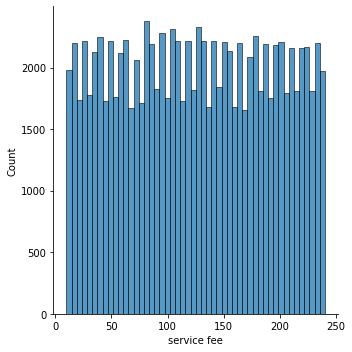

In [22]:
# Se corrigen los registros de "service fee" asumiendo que hubo un error en la digitación
df.loc[df['service fee'] < 0, 'service fee'] = 193
# No lo hago en df_new_tmp debido a que no hay registros con este error

sns.displot(df['service fee'], bins=50)

In [23]:
# Ahora si, completo los valores nulos con la media de la columna
df.fillna(value={'price': np.nanmean(df['price'], axis=0),
                 'service fee': np.nanmean(df['service fee'], axis=0)}, inplace=True)
df_new_tmp.fillna(value={'price': np.nanmean(df['price'], axis=0),
                         'service fee': np.nanmean(df['service fee'], axis=0)}, inplace=True)

# Verifico ahora los tipos de dato de "price" y "service fee", deben ser float64 
df.dtypes

id                       int64
neighbourhood group     object
neighbourhood           object
lat                    float64
long                   float64
instant_bookable         int64
cancellation_policy     object
room type               object
construction year      float64
price                  float64
service fee            float64
minimum nights         float64
availability 365       float64
number of reviews      float64
review rate number     float64
dtype: object

In [24]:
# 5. Llenar las columnas "minimum nights" y "availability 365" con la media de estas columnas
df.fillna(value={'minimum nights': np.nanmean(df['minimum nights'], axis=0),
                 'availability 365': np.nanmean(df['availability 365'], axis=0)}, inplace=True)
df_new_tmp.fillna(value={'minimum nights': np.nanmean(df['minimum nights'], axis=0),
                         'availability 365': np.nanmean(df['availability 365'], axis=0)}, inplace=True)

In [25]:
# 6. Eliminar la columna "review rate number"
df.drop('review rate number', axis=1, inplace=True)

# Verifico la cantidad de columnas, deberían ser 14 ahora
df.shape

(102083, 14)

In [26]:
# 7. Eliminar los inmuebles duplicados

# Busco los duplicados por "id" e imprimo algunos ejemplos
duplicates_by_id = df.loc[df['id'].duplicated(keep = False)]
duplicates_by_id[duplicates_by_id['id'].isin([35533894, 35578630, 6069793])].sort_values('id', ascending=False).head(10)

,id,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews
424,35578630,Queens,Jamaica,40.69091,-73.79589,0,moderate,Private room,2006.0,1.09,218.0,14.0,159.0,9.0
43816,35578630,Queens,Jamaica,40.69091,-73.79589,0,moderate,Private room,2006.0,1.09,218.0,14.0,159.0,9.0
236,35533894,Manhattan,Chelsea,40.74491,-74.00162,1,flexible,Entire home/apt,2008.0,112.00,22.0,30.0,207.0,45.0
21112,35533894,Manhattan,Chelsea,40.74491,-74.00162,1,flexible,Entire home/apt,2008.0,112.00,22.0,30.0,207.0,45.0
443,6069793,Brooklyn,Canarsie,40.64574,-73.90781,0,flexible,Entire home/apt,2004.0,203.00,41.0,7.0,95.0,0.0
78605,6069793,Brooklyn,Canarsie,40.64574,-73.90781,0,flexible,Entire home/apt,2004.0,203.00,41.0,7.0,95.0,0.0


Con estos 3 ejemplos se puede observar que hacen referencia a los mismos registros, solo buscándolos por 'id', se pueden eliminar.

In [27]:
# Elimino SOLO los duplicados, me interesa contar con los inmuebles únicos
df.drop_duplicates(subset = ['id'], keep='last', inplace=True)
df_new_tmp.drop_duplicates(subset = ['id'], keep='last', inplace=True)

In [28]:
# 8. Trabajar en terminos porcentuales con la columna "number of reviews"
max_number_or_reviews = df['number of reviews'].max()

df['number of reviews'] = df['number of reviews'].apply(lambda x: x * 100 / max_number_or_reviews)

# Imprimo el mínimo y el máximo de valores para "number of reviews", debería ir de 0 a 100
min_number_or_reviews = df['number of reviews'].min()
max_number_or_reviews = df['number of reviews'].max()
print(f'Rango en "number of reviews": De {min_number_or_reviews} a {max_number_or_reviews}')

Rango en "number of reviews": De 0.0 a 100.0


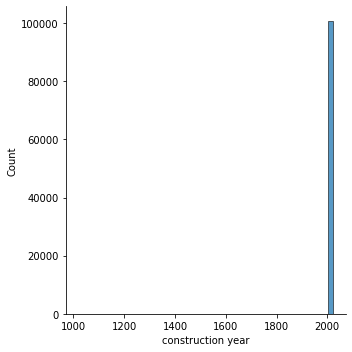

In [29]:
# 9. Arreglar los años de construcción que están muy por debajo o muy por encima del promedio
sns.displot(df['construction year'], bins=50)

Hay años que están muy por debajo de los años 2000.

In [30]:
df[df['construction year'] < 2000]

,id,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,construction year,price,service fee,minimum nights,availability 365,number of reviews
9202,18794785,Queens,Elmhurst,40.73873,-73.88147,1,strict,Entire home/apt,1020.0,430.0,86.0,2.0,130.0,3.515625
62045,18794233,Brooklyn,Flatbush,40.65090,-73.96266,1,flexible,Private room,1022.0,376.0,75.0,1.0,0.0,0.878906
65300,18582702,Brooklyn,Downtown Brooklyn,40.69489,-73.98322,1,moderate,Entire home/apt,1022.0,608.0,122.0,4.0,57.0,2.636719


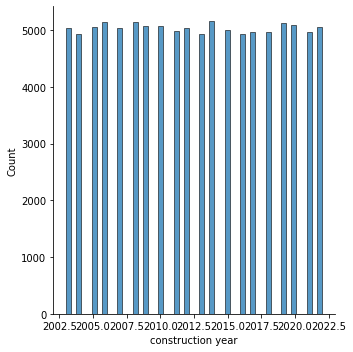

In [31]:
# Se corrigen los registros de estos años asumiendo que hubo un error en la digitación
df.loc[df['construction year'] == 1020, 'construction year'] = 2020
df.loc[df['construction year'] == 1022, 'construction year'] = 2022
df_new_tmp.loc[df_new_tmp['construction year'] == 1020, 'construction year'] = 2020
df_new_tmp.loc[df_new_tmp['construction year'] == 1022, 'construction year'] = 2022

sns.displot(df['construction year'], bins=50)

# Análisis exploratorio

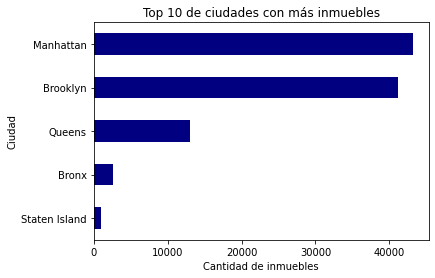

In [32]:
# Cuál es la ciudad con más inmuebles publicados?
most_rooms_city = df.groupby(['neighbourhood group']).agg({'id': 'count'})
most_rooms_city.rename(columns={'id': 'count'}, inplace=True)
most_rooms_city = most_rooms_city.sort_values('count', ascending=False).head(10)
most_rooms_city.sort_values('count', ascending=True, inplace=True)

most_rooms_city['count'].plot(kind='barh', colormap='jet', title='Top 10 de ciudades con más inmuebles')
plt.xlabel('Cantidad de inmuebles')
plt.ylabel('Ciudad')
plt.show()

Aquí se puede observar que:
1. La ciudad con más publicación de inmuebles es Manhattan. Muy seguramente por que es una de las ciudades más pobladas del mundo.
2. Staten Island está muy por debajo de Manhattan, lo que quiere decir que aunque estamos en New York no es un sitio donde se preste mucho para rentar inmuebles.

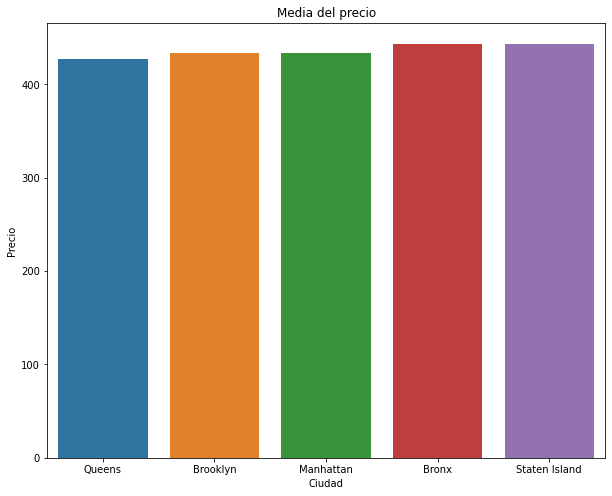

In [33]:
# Cuál es la ciudad con la media de precio más alta?
most_expensive_city = df.groupby(['neighbourhood group']).agg({'price': 'mean'})
most_expensive_city.reset_index(inplace=True)
most_expensive_city.columns = ['city', 'price_mean']
most_expensive_city = most_expensive_city.sort_values('price_mean', ascending=True)

plt.figure(figsize = (10,8))
ax = sns.barplot(x = most_expensive_city['city'], y = most_expensive_city['price_mean'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_xlabel('Ciudad')
ax.set_ylabel('Precio')
ax.set_title('Media del precio')
plt.show()

Aunque es la ciudad con la menor cantidad de inmuebles Staten Island tiene la media más alta en precios.

La media de los precios es similar en todas las ciudades, ronda los $ 400.

In [34]:
# Busco la correlación entre el precio, service fee y el número de reviews
df[['price', 'service fee', 'number of reviews']].corr()

,price,service fee,number of reviews
price,1.000000,0.173027,0.001686
service fee,0.173027,1.000000,0.005415
number of reviews,0.001686,0.005415,1.000000


Se puede observar que no hay mucha relación entre el precio, el service fee ni el número de reviews lo cuál quiere decir que las personas colocan reviews de sus estancias sin necesidad de preguntarse cuanto pagaron por estas.

# Última limpieza y prepración de los datos

Aún es necesario ejecutar los últimos pasos de limpieza:

In [35]:
# 1. El "id" del inmueble no aporta nada a la definición del modelo, esa columna se puede eliminar
df.drop('id', axis=1, inplace=True)
df_new_tmp.drop('id', axis=1, inplace=True)

# Verifico la cantidad de columnas, deberían ser 13 ahora
df.shape

(101547, 13)

In [36]:
# 2. Eliminar todas las filas que contengan valores nulos
df.dropna(axis=0, inplace=True)
df_new_tmp.dropna(axis=0, inplace=True)

# Ya no debe haber valores nulos
df.isnull().sum()

neighbourhood group    0
neighbourhood          0
lat                    0
long                   0
instant_bookable       0
cancellation_policy    0
room type              0
construction year      0
price                  0
service fee            0
minimum nights         0
availability 365       0
number of reviews      0
dtype: int64

In [37]:
# Cómo está distribuida la variable dependiente (target) en el dataset history?
df['number of reviews'].describe(percentiles = [.25, .5, .75, .95, .99, .999, .9999, .99999])

count      100460.000000
mean            2.670706
std             4.821695
min             0.000000
25%             0.097656
50%             0.683594
75%             2.929688
95%            12.109375
99%            22.558594
99.9%          40.775488
99.99%         63.236426
99.999%        98.613090
max           100.000000
Name: number of reviews, dtype: float64

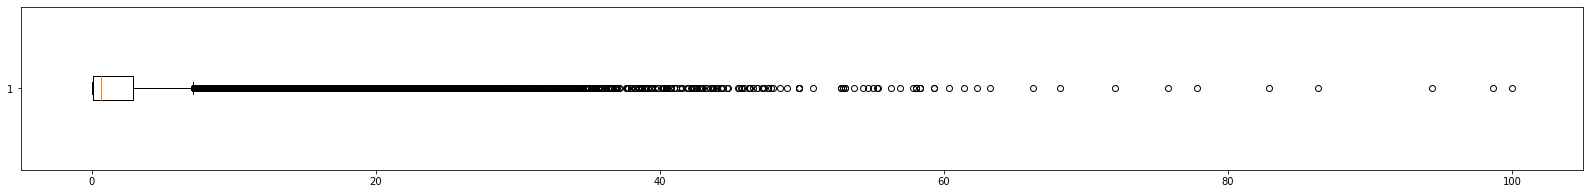

In [38]:
plt.figure(figsize = (28, 3))
plt.boxplot(df['number of reviews'], vert = False)
plt.show()

La mayoría de datos están igual o debajo del percentil 99.

In [39]:
# 3. Dejar por fuera a los outliers
df = df.loc[df['number of reviews'] <= df['number of reviews'].quantile(.99)]

# Reviso nuevamente la distribución de la variable dependiente (target)
df['number of reviews'].describe(percentiles = [.25, .5, .75, .95, .99, .999, .9999, .99999])

count      99465.000000
mean           2.390942
std            3.839166
min            0.000000
25%            0.097656
50%            0.683594
75%            2.832031
95%           11.132812
99%           18.164062
99.9%         22.070312
99.99%        22.558594
99.999%       22.558594
max           22.558594
Name: number of reviews, dtype: float64

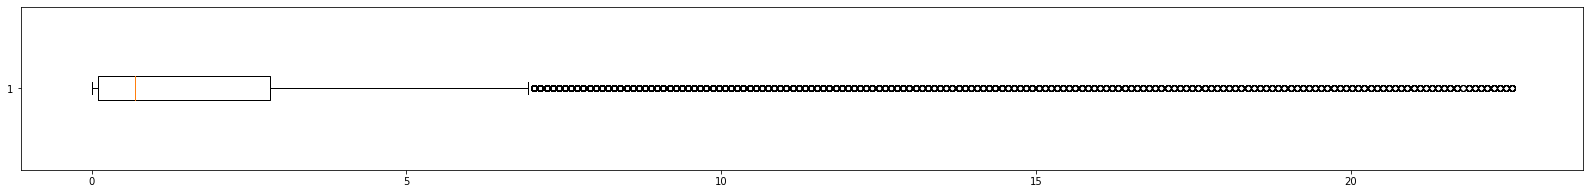

In [40]:
plt.figure(figsize = (28, 3))
plt.boxplot(df['number of reviews'], vert = False)
plt.show()

# Separación de variable dependiente y variables independientes

In [41]:
# Aplico OrdinalEncoder sobre los features categóricos para volverlos cuantitativos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

new_columns = ['neighbourhood_group',
               'neighbourhood',
               'cancellation_policy',
               'room_type',
               'lat',
               'long',
               'instant_bookable',
               'construction_year',
               'price',
               'service_fee',
               'minimum_nights',
               'availability_365']

ct = ColumnTransformer(transformers =[('OrdinalEncoder', OrdinalEncoder(dtype=np.int16),
                                       ['neighbourhood group', 'neighbourhood', 'cancellation_policy', 'room type'])],
                       remainder ='passthrough')
df_history = ct.fit_transform(df)
df_history = pd.DataFrame(data=df_history, columns=new_columns + ['number_of_reviews'])

df_new = ct.fit_transform(df_new_tmp)
df_new = pd.DataFrame(data=df_new, columns=new_columns)

In [42]:
# Imprimo el dataset history actualizado con las mejoras
df_history.head(5)

,neighbourhood_group,neighbourhood,cancellation_policy,room_type,lat,long,instant_bookable,construction_year,price,service_fee,minimum_nights,availability_365,number_of_reviews
0,2.0,98.0,2.0,0.0,40.76212,-73.98820,1.0,2011.0,851.0,170.0,4.0,199.0,10.937500
1,2.0,130.0,0.0,1.0,40.74623,-73.98499,1.0,2021.0,466.0,93.0,1.0,161.0,1.269531
2,2.0,205.0,0.0,2.0,40.78859,-73.97568,0.0,2004.0,874.0,175.0,14.0,0.0,0.097656
3,2.0,74.0,2.0,2.0,40.70817,-74.00511,0.0,2012.0,813.0,163.0,1.0,0.0,0.488281
4,2.0,122.0,1.0,0.0,40.72130,-73.98900,1.0,2007.0,326.0,65.0,4.0,301.0,0.878906


In [43]:
# Imprimo la cantidad de registros y filas que quedaron en history
df_history.shape

(99465, 13)

Me dispongo a preparar los datos, tener listos los datasets de la variable dependiente y las variables independientes:

In [44]:
# La variable dependiente sera 'number_of_reviews', las demas serán independientes
x = df_history.drop('number_of_reviews', axis=1)
y = df_history['number_of_reviews']

In [45]:
# Se divide el dataset en entrenamiento y prueba, donde entrenamiento tendrá el 80% de los datos
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

print(f'Train: {x_train.shape}')
print(f'Test: {x_test.shape}')

# Se estandariza el dataset usando 'StandarScaler'
name_columns = x_train.columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train.values) # Solo para datos de entrenamiento se utiliza "fit_transform"
x_test = sc.transform(x_test.values)

# Los datos se transforman a dataframes para mayor comodidad
x_train = pd.DataFrame(data=x_train, columns=name_columns)
x_test = pd.DataFrame(data=x_test, columns=name_columns)

Train: (79572, 12)
Test: (19893, 12)


# Entrenamientos de modelos

## Regresión lineal simple

In [46]:
# Se realiza el entrenamiento del modelo
from sklearn.linear_model import LinearRegression

simple_linear_regression = LinearRegression()
simple_linear_regression.fit(x_train, y_train)

# Se predicen los datos
y_pred_lr_train = simple_linear_regression.predict(x_train)
y_pred_lr_test = simple_linear_regression.predict(x_test)

# Se imprimen los 3 valores de los coeficientes que tengan la magnitud más
# grande, estos son los que influyen más en la desición de la predicción
coef_df = pd.concat([pd.Series(simple_linear_regression.feature_names_in_), pd.Series(simple_linear_regression.coef_)], axis=1)
coef_df.columns = ['feature', 'coef']

coef_df['coef'] = coef_df['coef'].apply(lambda x: abs(x))
coef_df = coef_df.sort_values('coef', ascending=False)
coef_df.head(3)

,feature,coef
11,availability_365,0.375595
10,minimum_nights,0.220675
5,long,0.212817


Los coeficientes con valores más grandes, y que influyen más en la predicción, corresponden a los features 'availability_365', 'minimum_nigths' y 'long'.

In [47]:
# Encuentro la raíz del error cuadrático medio (RMSE) para datos de train y de test
from sklearn.metrics import mean_squared_error

lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
print(f'LinearRegression train RMSE: {lr_train_rmse}')
print(f'LinearRegression test RMSE: {lr_test_rmse}')

LinearRegression train RMSE: 3.805812902828032
LinearRegression test RMSE: 3.7879342098315165


### Conclusiones de regresión lineal simple

1. El feature que más tiene peso en la predicción es "availability_365".
2. La unidad de medida de "number_of_reviews" quedó en téminos de porcentaje y el RMSE está en un 3.80% aproximadamente. Mientras tanto la media de "number_of_reviews" es de 2.39% ... esto quiere decir que el modelo no es muy bueno ni tampoco es malo. La diferencia porcentual es de solo 1.41%, sin embargo el error casi que duplica a la media de "number_of_reviews".
3. No hay overfitting, pero puede haber un poco de underfitting.
4. Procedo a evaluar más modelos con gradiente descendente, funciones de regulariación y transformación polinomial pero lo más seguro es que el RMSE aumente.

## Gradiente descendente

In [48]:
# Se realiza el entrenamiento del modelo sin penalidad
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(penalty=None)
sgd_regressor.fit(x_train, y_train)

# Se predicen los datos
y_pred_sgd_train = sgd_regressor.predict(x_train)
y_pred_sgd_test = sgd_regressor.predict(x_test)

# Encuentro la raíz del error cuadrático medio (RMSE) para datos de train y de test
sgd_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_sgd_train))
sgd_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_sgd_test))
print(f'SGDRegressor train RMSE: {sgd_train_rmse}')
print(f'SGDRegressor test RMSE: {sgd_test_rmse}')

SGDRegressor train RMSE: 3.8106422055148506
SGDRegressor test RMSE: 3.7948420071120084


El error es muy grande, voy a aplicar una función de regularización para ver que sucede.

In [49]:
# Se realiza el entrenamiento del modelo con penalidad l1
sgd_regressor_l1 = SGDRegressor(penalty='l1')
sgd_regressor_l1.fit(x_train, y_train)

# Se predicen los datos
y_pred_sgd_l1_train = sgd_regressor_l1.predict(x_train)
y_pred_sgd_l1_test = sgd_regressor_l1.predict(x_test)

# Encuentro la raíz del error cuadrático medio (RMSE) para datos de train y de test
sgd_l1_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_sgd_l1_train))
sgd_l1_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_sgd_l1_test))
print(f'SGDRegressor L1 train RMSE: {sgd_l1_train_rmse}')
print(f'SGDRegressor L1 test RMSE: {sgd_l1_test_rmse}')

SGDRegressor L1 train RMSE: 6.506491180474639
SGDRegressor L1 test RMSE: 6.196079192426692


Aún aplicando la función de regularización L1 se ve que el error RMSE es muy grande. Voy con función de regularización L2.

In [50]:
# Se realiza el entrenamiento del modelo con penalidad l1
sgd_regressor_l2 = SGDRegressor(penalty='l2')
sgd_regressor_l2.fit(x_train, y_train)

# Se predicen los datos
y_pred_sgd_l2_train = sgd_regressor_l2.predict(x_train)
y_pred_sgd_l2_test = sgd_regressor_l2.predict(x_test)

# Encuentro la raíz del error cuadrático medio (RMSE) para datos de train y de test
sgd_l2_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_sgd_l2_train))
sgd_l2_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_sgd_l2_test))
print(f'SGDRegressor L2 train RMSE: {sgd_l2_train_rmse}')
print(f'SGDRegressor L2 test RMSE: {sgd_l2_test_rmse}')

SGDRegressor L2 train RMSE: 3.819696345655724
SGDRegressor L2 test RMSE: 3.798353328708896


### Conclusiones de gradiente descendente

1. El error RMSE fue mucho más grande que el encontrado con la regresión lineal.
2. Inclusive aplicando funciones de regularación se observa que el error no mejora.
3. Las funciones de regularización se aplican para mejorar un modelo con underfitting, pero como este no era el caso por eso obtenemos errores muy grandes.

## Transformación polinomial

In [51]:
# Polinomio con 2 grados
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [52]:
# Obtener variable dependiente y variables independientes
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.20, random_state=1)

print(f'Train: {x_train.shape}')
print(f'Test: {x_test.shape}')

# Se estandariza el dataset usando 'StandarScaler'
sc = StandardScaler()
x_train = sc.fit_transform(x_train) # Solo para datos de entrenamiento se utiliza "fit_transform"
x_test = sc.transform(x_test)

Train: (79572, 90)
Test: (19893, 90)


El número de columnas aumentó a 90.

### Gradiente descendente y transformación polynomial 2

In [53]:
# Se realiza el entrenamiento del modelo con penalty=None
sgd_regressor_poly2 = SGDRegressor(penalty=None)
sgd_regressor_poly2.fit(x_train, y_train)

# Se predicen los datos
y_pred_poly2_train = sgd_regressor_poly2.predict(x_train)
y_pred_poly2_test = sgd_regressor_poly2.predict(x_test)

# Encuentro la raíz del error cuadrático medio (RMSE) para datos de train y de test
sgd_poly2_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_poly2_train))
sgd_poly2_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly2_test))
print(f'SGDRegressor Poly2 train RMSE: {sgd_poly2_train_rmse}')
print(f'SGDRegressor Poly2 test RMSE: {sgd_poly2_test_rmse}')

SGDRegressor Poly2 train RMSE: 120687873180.47685
SGDRegressor Poly2 test RMSE: 37491841668.35758


El error es muy alto, intento con regularización L1.

In [54]:
# Se realiza el entrenamiento del modelo con penalty='l1'
sgd_regressor_poly2_l1 = SGDRegressor(penalty='l1')
sgd_regressor_poly2_l1.fit(x_train, y_train)

# Se predicen los datos
y_pred_poly2_l1_train = sgd_regressor_poly2_l1.predict(x_train)
y_pred_poly2_l1_test = sgd_regressor_poly2_l1.predict(x_test)

# Encuentro la raíz del error cuadrático medio (RMSE) para datos de train y de test
sgd_poly2_l1_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_poly2_l1_train))
sgd_poly2_l1_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly2_l1_test))
print(f'SGDRegressor Poly2 L1 train RMSE: {sgd_poly2_l1_train_rmse}')
print(f'SGDRegressor Poly2 L1 test RMSE: {sgd_poly2_l1_test_rmse}')

SGDRegressor Poly2 L1 train RMSE: 90800303681.67638
SGDRegressor Poly2 L1 test RMSE: 33239352986.495705


El error sigue siendo alto, intento con regularización L2.

In [55]:
# Se realiza el entrenamiento del modelo con penalty='l2'
sgd_regressor_poly2_l2 = SGDRegressor(penalty='l2')
sgd_regressor_poly2_l2.fit(x_train, y_train)

# Se predicen los datos
y_pred_poly2_l2_train = sgd_regressor_poly2_l2.predict(x_train)
y_pred_poly2_l2_test = sgd_regressor_poly2_l2.predict(x_test)

# Encuentro la raíz del error cuadrático medio (RMSE) para datos de train y de test
sgd_poly2_l2_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_poly2_l2_train))
sgd_poly2_l2_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly2_l2_test))
print(f'SGDRegressor Poly2 L2 train RMSE: {sgd_poly2_l2_train_rmse}')
print(f'SGDRegressor Poly2 L2 test RMSE: {sgd_poly2_l2_test_rmse}')

SGDRegressor Poly2 L2 train RMSE: 67651732492.7369
SGDRegressor Poly2 L2 test RMSE: 28606141440.629864


Igual, el error es muy alto.

Hago el mismo proceso aumentando el número de polinomios.

In [56]:
# Polinomio con 4 grados
poly_features = PolynomialFeatures(degree=4, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [57]:
# Obtener variable dependiente y variables independientes
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.20, random_state=1)

print(f'Train: {x_train.shape}')
print(f'Test: {x_test.shape}')

# Se estandariza el dataset usando 'StandarScaler'
sc = StandardScaler()
x_train = sc.fit_transform(x_train) # Solo para datos de entrenamiento se utiliza "fit_transform"
x_test = sc.transform(x_test)

Train: (79572, 1819)
Test: (19893, 1819)


El número de columnas aumentó a 1819.

### Gradiente descendente y transformación polynomial 4

In [58]:
# Se realiza el entrenamiento del modelo con penalty=None
sgd_regressor_poly5 = SGDRegressor(penalty=None)
sgd_regressor_poly5.fit(x_train, y_train)

# Se predicen los datos
y_pred_poly5_train = sgd_regressor_poly5.predict(x_train)
y_pred_poly5_test = sgd_regressor_poly5.predict(x_test)

# Encuentro la raíz del error cuadrático medio (RMSE) para datos de train y de test
sgd_poly5_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_poly5_train))
sgd_poly5_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly5_test))
print(f'SGDRegressor Poly5 train RMSE: {sgd_poly5_train_rmse}')
print(f'SGDRegressor Poly5 test RMSE: {sgd_poly5_test_rmse}')

SGDRegressor Poly5 train RMSE: 2577741920898.03
SGDRegressor Poly5 test RMSE: 558462077576.7395


### Conclusiones de transformación polinomial con gradiente descendente

1. Se confirma que en un modelo que no tiene overfitting no vale la pena aplicar funciones de reglarización ni transformación polinomial ya que el error RMSE no mejora.
2. Al aumentar los grados del polinomio el error empeoraba.

# Trabajar con el dataset new

El mejor modelo es el construido con LinearRegression, ahora procedo a predecir con el dataset `df_new`.

In [59]:
# Se predicen los datos
y_pred_lr_train_new = simple_linear_regression.predict(df_new)

# Estos son los resultados
results = pd.DataFrame(data={'number_of_reviews_pred': y_pred_lr_train_new})
results

,number_of_reviews_pred
0,75.686705
1,50.329731
2,33.386957
3,25.679675
4,163.531788
...,...
507,27.565709
508,35.393154
509,136.001592
510,41.036533


Reviso las gráficas de distribución para "y_pred_lr_train" (Predicho con los datos de entrenamiento) y para "y_pred_lr_train_new" (Predicho con el dataset nuevo).

In [60]:
# Reviso la distribución de los datos predichos en train
results_train = pd.DataFrame(data={'number_of_reviews_pred': y_pred_lr_train})
results_train['number_of_reviews_pred'].describe(percentiles = [.25, .5, .75, .95, .99])

count    79572.000000
mean         2.393397
std          0.529133
min        -37.529712
25%          2.010962
50%          2.347329
75%          2.731321
95%          3.271983
99%          3.605460
max         11.736288
Name: number_of_reviews_pred, dtype: float64

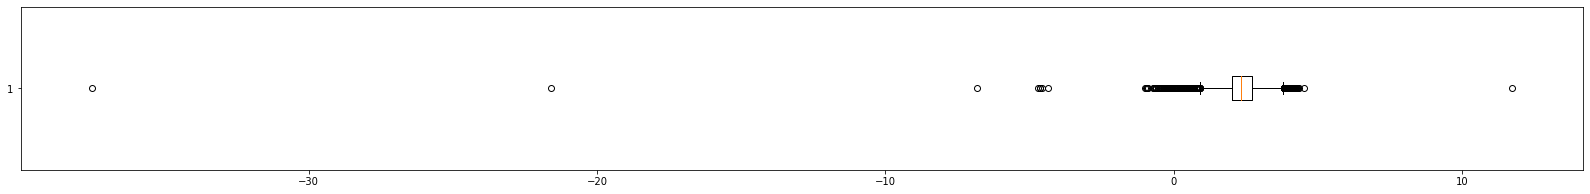

In [61]:
plt.figure(figsize = (28, 3))
plt.boxplot(results_train['number_of_reviews_pred'], vert = False)
plt.show()

In [62]:
# Reviso la distribución de los datos predichos con el dataset new
results['number_of_reviews_pred'].describe(percentiles = [.25, .5, .75, .95, .99])

count    512.000000
mean      75.253061
std       50.693726
min      -22.953933
25%       29.634954
50%       58.654852
75%      122.049306
95%      161.888967
99%      172.560709
max      184.081267
Name: number_of_reviews_pred, dtype: float64

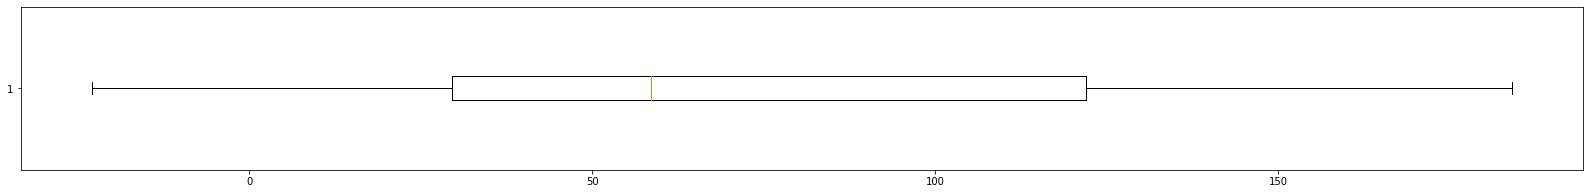

In [63]:
plt.figure(figsize = (28, 3))
plt.boxplot(results['number_of_reviews_pred'], vert = False)
plt.show()

# Conclusiones

1. Revisando las distribuciones de los datos predichos en train y con el dataset new no son similares.
2. El número máximo para "number of reviews" de nuestro modelo era el 100% y en los datos predichos tenemos números mucho más grandes, inclusive hasta se obtuvieron números negativos.

Es por eso que he decidido que todos los datos predichos que estén por debajo del 100% (Serían los que estén por debajo del percentil 75) son los inmuebles menos populares.

In [64]:
# Concateno los datasets para poder trabajar mejor
df_new = pd.concat([df_new, results], axis=1)

# Ahora el dataset new ya cuenta con los datos predichos
df_new.head(5)

,neighbourhood_group,neighbourhood,cancellation_policy,room_type,lat,long,instant_bookable,construction_year,price,service_fee,minimum_nights,availability_365,number_of_reviews_pred
0,3.0,63.0,1.0,2.0,40.68432,-73.85862,0.0,2006.0,519.0,104.0,1.0,141.075439,75.686705
1,2.0,15.0,1.0,0.0,40.71317,-74.00654,0.0,2006.0,987.0,197.0,2.0,42.000000,50.329731
2,3.0,24.0,0.0,2.0,40.76441,-73.88943,1.0,2018.0,999.0,200.0,2.0,0.000000,33.386957
3,2.0,38.0,2.0,2.0,40.73442,-73.98383,1.0,2011.0,497.0,99.0,4.0,0.000000,25.679675
4,2.0,85.0,2.0,0.0,40.79660,-73.97154,1.0,2022.0,820.0,164.0,4.0,376.000000,163.531788


In [65]:
# Calculo el presupuesto basado en el precio de los inmuebles
less_popular_df = df_new.loc[df_new['number_of_reviews_pred'] <= df_new['number_of_reviews_pred'].quantile(.75)]

budget = less_popular_df['price'].sum() * 0.02
print(f'Presupuesto necesario: $ {budget}')

# Calculo el total de inmuebles a promocionar
property_count = len(less_popular_df)
print(f'Total de inmuebles a promocionar: {property_count}')

Presupuesto necesario: $ 3206.6795999999995
Total de inmuebles a promocionar: 384
